In [1]:
!pip3 install pandas
!pip3 install seaborn
!pip3 install --upgrade tensorflow-gpu
!pip3 install import-ipynb

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
import pickle
import time
import sys

import import_ipynb
import VariationalAutoencoderModel

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
importing Jupyter notebook from VariationalAutoencoderModel.ipynb
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction = 0.333)
sess = tf.compat.v1.Session(config = tf.compat.v1.ConfigProto(gpu_options = gpu_options))

# Simple Home 1002 Camera Data Pre-Processing

In [3]:
# Benign traffic

s2_benign = pd.read_csv('nbaiot/SimpleHome_XCS7_1002_WHT_Security_Camera/benign_traffic.csv', encoding = "utf-8", sep = ',' ) 
df_s2_benign = s2_benign.copy(deep=True)

columns = list(df_s2_benign.columns)
chosen_columns = []
for column in columns:
    if column.find('L5') != -1:
        chosen_columns.append(column)
        
df_s2_benign = pd.DataFrame(df_s2_benign, columns = chosen_columns)  


# Mirai

s2_mirai_ack = pd.read_csv('nbaiot/SimpleHome_XCS7_1002_WHT_Security_Camera/mirai/ack.csv', encoding = "utf-8", sep = ',' ) 
df_s2_mirai_ack = s2_mirai_ack.copy(deep=True)
df_s2_mirai_ack = pd.DataFrame(df_s2_mirai_ack, columns = chosen_columns)

s2_mirai_scan = pd.read_csv('nbaiot/SimpleHome_XCS7_1002_WHT_Security_Camera/mirai/scan.csv', encoding = "utf-8", sep = ',' ) 
df_s2_mirai_scan = s2_mirai_scan.copy(deep=True)
df_s2_mirai_scan = pd.DataFrame(df_s2_mirai_scan, columns = chosen_columns)

s2_mirai_syn = pd.read_csv('nbaiot/SimpleHome_XCS7_1002_WHT_Security_Camera/mirai/syn.csv', encoding = "utf-8", sep = ',' ) 
df_s2_mirai_syn = s2_mirai_syn.copy(deep=True)
df_s2_mirai_syn = pd.DataFrame(df_s2_mirai_syn, columns = chosen_columns)

s2_mirai_udp = pd.read_csv('nbaiot/SimpleHome_XCS7_1002_WHT_Security_Camera/mirai/udp.csv', encoding = "utf-8", sep = ',' ) 
df_s2_mirai_udp = s2_mirai_udp.copy(deep=True)
df_s2_mirai_udp = pd.DataFrame(df_s2_mirai_udp, columns = chosen_columns)

s2_mirai_udpplain = pd.read_csv('nbaiot/SimpleHome_XCS7_1002_WHT_Security_Camera/mirai/udpplain.csv', encoding = "utf-8", sep = ',' ) 
df_s2_mirai_udpplain = s2_mirai_udpplain.copy(deep=True)
df_s2_mirai_udpplain = pd.DataFrame(df_s2_mirai_udpplain, columns = chosen_columns)

# Bashlite

s2_bashlite_combo = pd.read_csv('nbaiot/SimpleHome_XCS7_1002_WHT_Security_Camera/gafgyt/combo.csv', encoding = "utf-8", sep = ',' ) 
df_s2_bashlite_combo = s2_bashlite_combo.copy(deep=True)
df_s2_bashlite_combo = pd.DataFrame(df_s2_bashlite_combo, columns = chosen_columns)

s2_bashlite_junk = pd.read_csv('nbaiot/SimpleHome_XCS7_1002_WHT_Security_Camera/gafgyt/junk.csv', encoding = "utf-8", sep = ',' ) 
df_s2_bashlite_junk = s2_bashlite_junk.copy(deep=True)
df_s2_bashlite_junk = pd.DataFrame(df_s2_bashlite_junk, columns = chosen_columns)

s2_bashlite_scan = pd.read_csv('nbaiot/SimpleHome_XCS7_1002_WHT_Security_Camera/gafgyt/scan.csv', encoding = "utf-8", sep = ',' ) 
df_s2_bashlite_scan = s2_bashlite_scan.copy(deep=True)
df_s2_bashlite_scan = pd.DataFrame(df_s2_bashlite_scan, columns = chosen_columns)

s2_bashlite_udp = pd.read_csv('nbaiot/SimpleHome_XCS7_1002_WHT_Security_Camera/gafgyt/udp.csv', encoding = "utf-8", sep = ',' ) 
df_s2_bashlite_udp = s2_bashlite_udp.copy(deep=True)
df_s2_bashlite_udp = pd.DataFrame(df_s2_bashlite_udp, columns = chosen_columns)

s2_bashlite_tcp = pd.read_csv('nbaiot/SimpleHome_XCS7_1002_WHT_Security_Camera/gafgyt/tcp.csv', encoding = "utf-8", sep = ',' ) 
df_s2_bashlite_tcp = s2_bashlite_tcp.copy(deep=True)
df_s2_bashlite_tcp = pd.DataFrame(df_s2_bashlite_tcp, columns = chosen_columns)

In [4]:
scaler = MinMaxScaler()
df_s2_benign_norm = scaler.fit_transform(df_s2_benign)

df_s2_miraiack_norm = scaler.fit_transform(df_s2_mirai_ack)
df_s2_miraiscan_norm = scaler.fit_transform(df_s2_mirai_scan)
df_s2_miraisyn_norm = scaler.fit_transform(df_s2_mirai_syn)
df_s2_miraiudp_norm = scaler.fit_transform(df_s2_mirai_udp)
df_s2_miraiudpplain_norm = scaler.fit_transform(df_s2_mirai_udpplain)

df_s2_bashlitecombo_norm = scaler.fit_transform(df_s2_bashlite_combo)
df_s2_bashlitejunk_norm = scaler.fit_transform(df_s2_bashlite_junk)
df_s2_bashlitescan_norm = scaler.fit_transform(df_s2_bashlite_scan)
df_s2_bashliteudp_norm = scaler.fit_transform(df_s2_bashlite_udp)
df_s2_bashlitetcp_norm = scaler.fit_transform(df_s2_bashlite_tcp)

# Variational Autoencoder - Attack Detection

## Model

In [5]:
# Train set

len_benign = len(df_s2_benign_norm)
len_benign_train = int(0.7 * len_benign)
X_train_VAE = df_s2_benign_norm[:len_benign_train]

# Test set - 30% benign and the rest is attack

X_test_benign = df_s2_benign_norm[len_benign_train:]

len_attack_test = len(X_test_benign)
X_test_mirai_ack = df_s2_miraiack_norm
X_test_mirai_scan = df_s2_miraiscan_norm
X_test_mirai_syn = df_s2_miraisyn_norm
X_test_mirai_udp = df_s2_miraiudp_norm
X_test_mirai_udpplain = df_s2_miraiudpplain_norm
X_test_bashlite_combo = df_s2_bashlitecombo_norm
X_test_bashlite_junk = df_s2_bashlitejunk_norm
X_test_bashlite_scan = df_s2_bashlitescan_norm
X_test_bashlite_tcp = df_s2_bashlitetcp_norm
X_test_bashlite_udp = df_s2_bashliteudp_norm

X_test_VAE = np.concatenate([X_test_benign, X_test_mirai_ack, X_test_mirai_scan, X_test_mirai_syn, X_test_mirai_udp,
                             X_test_mirai_udpplain, X_test_bashlite_combo, X_test_bashlite_junk, X_test_bashlite_scan,
                             X_test_bashlite_tcp, X_test_bashlite_udp])

Y_test_VAE = np.ones(len(X_test_VAE))
Y_test_VAE[:len(X_test_benign)] = 0

In [6]:
# KL Loss function

def vae_loss(x, x_decoded_mean):
    # Compute the average MSE error, then scale it up (sum on all axes)
    
    reconstruction_loss = K.sum(K.square(x - x_decoded_mean))
    
    # Compute the KL loss
    
    kl_loss = - 0.5 * K.sum(1 + z_var - K.square(z_mean) - K.square(K.exp(z_var)), axis=-1)
    
    # Return the average loss over all 
    
    total_loss = K.mean(reconstruction_loss + kl_loss) # Total_loss = reconstruction_loss + kl_loss 
    return total_loss

# (1) Reconstruction Loss - Forces the encoder to generate latent features that minimize the reconstruction error, or else is
# penalized
# (2) KL Loss - Forces the distribution generated by the encoder to be similar to the prior probability of the input vector, 
# pushing latent feature space to normality

In [7]:
# Parameters

original_dim = X_train_VAE.shape[1]
input_shape = (original_dim,)
intermediate_dim = int(original_dim / 2)
latent_dim = int(original_dim / 3)

epochs = 450
learning_rate = 0.00005
batch_size = 23
anomaly_threshold = 0.056
number_features = 23

In [8]:
# Encoder

inputs, encoder, z_var, z_mean = VariationalAutoencoderModel.vae_encoder(
    input_shape, 
    intermediate_dim, 
    latent_dim, 
    VariationalAutoencoderModel.sample)

encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 23)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 11)           264         encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 7)            84          dense[0][0]                      
__________________________________________________________________________________________________
z_var (Dense)                   (None, 7)            84          dense[0][0]                      
____________________________________________________________________________________________

In [9]:
# Decoder

decoder = VariationalAutoencoderModel.vae_decoder(
    intermediate_dim,
    latent_dim,
    original_dim)

decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 7)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                88        
_________________________________________________________________
dense_2 (Dense)              (None, 23)                276       
Total params: 364
Trainable params: 364
Non-trainable params: 0
_________________________________________________________________


In [10]:
# VAE model

outputs = decoder(encoder(inputs))

opt = optimizers.Adam(learning_rate = learning_rate, clipvalue = 0.5)

vae_model = Model(inputs, outputs, name = 'vae_mlp')
vae_model.compile(optimizer = opt, loss = vae_loss)
vae_model.summary()

Model: "vae_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 23)]              0         
_________________________________________________________________
encoder (Functional)         (None, 7)                 432       
_________________________________________________________________
decoder (Functional)         (None, 23)                364       
Total params: 796
Trainable params: 796
Non-trainable params: 0
_________________________________________________________________


## Train

In [11]:
train_start = time.time()

results = vae_model.fit(X_train_VAE, X_train_VAE,
                        shuffle = True,
                        epochs = epochs,
                        batch_size = batch_size)

train_end = time.time()
train_time = train_end - train_start
print("Training time:", train_time)

Train on 32609 samples
Epoch 1/450
32609/32609 [==============================] - 3s 100us/sample - loss: 79.1374
Epoch 2/450
32609/32609 [==============================] - 3s 89us/sample - loss: 39.5620
Epoch 3/450
32609/32609 [==============================] - 3s 80us/sample - loss: 19.8175
Epoch 4/450
32609/32609 [==============================] - 3s 77us/sample - loss: 15.0318
Epoch 5/450
32609/32609 [==============================] - 3s 77us/sample - loss: 13.2457
Epoch 6/450
32609/32609 [==============================] - 3s 78us/sample - loss: 12.0953
Epoch 7/450
32609/32609 [==============================] - 3s 78us/sample - loss: 11.1816
Epoch 8/450
32609/32609 [==============================] - 3s 77us/sample - loss: 10.4263
Epoch 9/450
32609/32609 [==============================] - 3s 92us/sample - loss: 9.6192
Epoch 10/450
32609/32609 [==============================] - 3s 103us/sample - loss: 8.7268
Epoch 11/450
32609/32609 [==============================] - 3s 103us/sample 

32609/32609 [==============================] - 3s 102us/sample - loss: 2.0690
Epoch 91/450
32609/32609 [==============================] - 3s 103us/sample - loss: 2.0786
Epoch 92/450
32609/32609 [==============================] - 3s 103us/sample - loss: 2.0807
Epoch 93/450
32609/32609 [==============================] - 3s 96us/sample - loss: 2.0890
Epoch 94/450
32609/32609 [==============================] - 3s 85us/sample - loss: 2.0923
Epoch 95/450
32609/32609 [==============================] - 3s 85us/sample - loss: 2.0964
Epoch 96/450
32609/32609 [==============================] - 3s 84us/sample - loss: 2.0788
Epoch 97/450
32609/32609 [==============================] - 3s 85us/sample - loss: 2.0524
Epoch 98/450
32609/32609 [==============================] - 3s 85us/sample - loss: 2.0728
Epoch 99/450
32609/32609 [==============================] - 3s 85us/sample - loss: 2.0644
Epoch 100/450
32609/32609 [==============================] - 3s 85us/sample - loss: 2.0811
Epoch 101/450
32609

32609/32609 [==============================] - 3s 101us/sample - loss: 2.1398
Epoch 180/450
32609/32609 [==============================] - 3s 102us/sample - loss: 2.1497
Epoch 181/450
32609/32609 [==============================] - 3s 102us/sample - loss: 2.1361
Epoch 182/450
32609/32609 [==============================] - 3s 101us/sample - loss: 2.1479
Epoch 183/450
32609/32609 [==============================] - 3s 102us/sample - loss: 2.1472
Epoch 184/450
32609/32609 [==============================] - 3s 101us/sample - loss: 2.1488
Epoch 185/450
32609/32609 [==============================] - 3s 101us/sample - loss: 2.1426
Epoch 186/450
32609/32609 [==============================] - 3s 101us/sample - loss: 2.1450
Epoch 187/450
32609/32609 [==============================] - 3s 102us/sample - loss: 2.1720
Epoch 188/450
32609/32609 [==============================] - 3s 102us/sample - loss: 2.1416
Epoch 189/450
32609/32609 [==============================] - 3s 102us/sample - loss: 2.1663
Ep

32609/32609 [==============================] - 4s 108us/sample - loss: 2.1781
Epoch 269/450
32609/32609 [==============================] - 4s 108us/sample - loss: 2.1666
Epoch 270/450
32609/32609 [==============================] - 4s 108us/sample - loss: 2.1725
Epoch 271/450
32609/32609 [==============================] - 4s 110us/sample - loss: 2.1649
Epoch 272/450
32609/32609 [==============================] - 4s 108us/sample - loss: 2.1675
Epoch 273/450
32609/32609 [==============================] - 4s 109us/sample - loss: 2.1545
Epoch 274/450
32609/32609 [==============================] - 4s 109us/sample - loss: 2.1832
Epoch 275/450
32609/32609 [==============================] - 4s 109us/sample - loss: 2.1686
Epoch 276/450
32609/32609 [==============================] - 4s 110us/sample - loss: 2.1542
Epoch 277/450
32609/32609 [==============================] - 4s 109us/sample - loss: 2.1633
Epoch 278/450
32609/32609 [==============================] - 4s 110us/sample - loss: 2.1529
Ep

32609/32609 [==============================] - 3s 97us/sample - loss: 2.0495
Epoch 358/450
32609/32609 [==============================] - 3s 90us/sample - loss: 2.0693
Epoch 359/450
32609/32609 [==============================] - 3s 96us/sample - loss: 2.0682
Epoch 360/450
32609/32609 [==============================] - 3s 97us/sample - loss: 2.0485
Epoch 361/450
32609/32609 [==============================] - 3s 98us/sample - loss: 2.0546
Epoch 362/450
32609/32609 [==============================] - 3s 79us/sample - loss: 2.0737
Epoch 363/450
32609/32609 [==============================] - 3s 94us/sample - loss: 2.0651
Epoch 364/450
32609/32609 [==============================] - 3s 94us/sample - loss: 2.0653
Epoch 365/450
32609/32609 [==============================] - 3s 94us/sample - loss: 2.0495
Epoch 366/450
32609/32609 [==============================] - 3s 95us/sample - loss: 2.0521
Epoch 367/450
32609/32609 [==============================] - 3s 95us/sample - loss: 2.0265
Epoch 368/450

32609/32609 [==============================] - 4s 110us/sample - loss: 2.0056
Epoch 447/450
32609/32609 [==============================] - 4s 109us/sample - loss: 2.0068
Epoch 448/450
32609/32609 [==============================] - 4s 109us/sample - loss: 1.9947
Epoch 449/450
32609/32609 [==============================] - 4s 109us/sample - loss: 2.0006
Epoch 450/450
32609/32609 [==============================] - 4s 110us/sample - loss: 1.9923
Training time: 1508.8247320652008


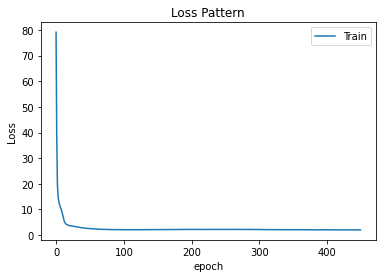

In [12]:
plt.plot(results.history['loss'])
plt.title('Loss Pattern')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper right');
plt.show()

## Test

In [13]:
X_train_pred = vae_model.predict(X_train_VAE)
error_vector = VariationalAutoencoderModel.get_error_term(X_train_pred, X_train_VAE, _rmse=False)
error_thresh = anomaly_threshold

# Measure the error between the train set and its output and generates an error vector representing the error of each term
# Find an extreme value on the vector to use as the error threshold

/home/andressa.amaral/.local/lib/python3.6/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [14]:
test_start = time.time()

X_pred_VAE = vae_model.predict(X_test_VAE)

test_end = time.time()
test_time = test_end - test_start
print("Testing time:", test_time)

# If the error of the vector is higher than the defined threshold it detects an attack

error_vector = VariationalAutoencoderModel.get_error_term(X_pred_VAE, X_test_VAE, _rmse=False)
attacks = (error_vector > error_thresh)
print(attacks)

np.count_nonzero(attacks) / len(attacks) # Percentage of attacks

Testing time: 30.439446210861206
[False False False ...  True  True  True]


0.9838219657606084

In [15]:
print(len(X_test_VAE))

830447


## Metrics

In [16]:
sys.stdout = open("Results/S1002_camera.txt", "a")

print(" ==== Test " + str(number_features) + " Normal learning rate ====")
print("Training time:" + str(train_time))
print("Testing time:" + str(test_time))
print(classification_report(Y_test_VAE, attacks, digits = 5))

In [17]:
# Examinig the latent space generated by the encoder

X_encoded = encoder.predict(X_test_VAE)

pca = PCA(n_components=2)
X_analysis = pca.fit_transform(X_encoded)

In [18]:
'''plt.figure(figsize = (12, 10))
sns.scatterplot(x = X_analysis[:, 0], y = X_analysis[:, 1], s = 20, hue = error_vector)
plt.grid()
plt.show()

# Darker clusters indicate that the error is higher'''

'plt.figure(figsize = (12, 10))\nsns.scatterplot(x = X_analysis[:, 0], y = X_analysis[:, 1], s = 20, hue = error_vector)\nplt.grid()\nplt.show()\n\n# Darker clusters indicate that the error is higher'

In [19]:
'''plt.figure(figsize=(12, 10))
sns.scatterplot(x = X_analysis[:, 0], y = X_analysis[:, 1], s = 20, hue = attacks)
plt.grid()
plt.show()

# Orange ones are anomalies'''

'plt.figure(figsize=(12, 10))\nsns.scatterplot(x = X_analysis[:, 0], y = X_analysis[:, 1], s = 20, hue = attacks)\nplt.grid()\nplt.show()\n\n# Orange ones are anomalies'

In [20]:
'''plt.figure(figsize = (12, 10))
sns.scatterplot(x = X_analysis[:, 0], y = X_analysis[:, 1], s = 20, hue = Y_test_VAE)
plt.grid()
plt.show()

# Ground truth'''

'plt.figure(figsize = (12, 10))\nsns.scatterplot(x = X_analysis[:, 0], y = X_analysis[:, 1], s = 20, hue = Y_test_VAE)\nplt.grid()\nplt.show()\n\n# Ground truth'